In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import joblib

# DATASET CREATION

In [3]:
n_samples = 10000
n_questions = 20

n_answers = 2
n_classes = 5

In [30]:
def generate_data(n_samples, n_questions, n_answers, n_classes):
    X = np.zeros((n_samples, n_questions), dtype=np.int32)
    Y = np.zeros(n_samples, dtype=np.int32)
    for class_ in range(n_classes):
        n_samples_class = int(n_samples / n_classes)
        n_question_class = int(n_questions / n_classes)
        X_class = np.ones((n_samples_class, n_questions), dtype=np.int32)
        X_class[:, class_ * n_question_class:(class_ + 1) * n_question_class] = np.random.randint(0, n_answers, size=(n_samples_class, n_question_class))
        Y_class = np.ones(n_samples_class, dtype=np.int32) * class_

        X[class_ * n_samples_class:(class_ + 1) * n_samples_class] = X_class
        Y[class_ * n_samples_class:(class_ + 1) * n_samples_class] = Y_class

    X, Y = shuffle(X, Y)
    return X, Y

def questionaries_to_df():
    X, Y = generate_data(n_samples, n_questions, n_answers, n_classes)
    Q_cols = [f"Q{i+1}" for i in range(X.shape[1])]
    Y_col = ["Disease"]

    tot_cols = Q_cols + Y_col
    df = pd.DataFrame(np.hstack((X, Y[:, None])), columns=tot_cols)
    df.to_csv("symptoms.csv", index=False)

questionaries_to_df()

# Data Engineering

In [4]:
# load dataset
df = pd.read_csv("symptoms.csv")
df = shuffle(df)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Disease
9287,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
5832,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,3
4282,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,3
7030,1,1,1,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
9845,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,4
7501,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
9132,1,1,1,1,0,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
8852,1,1,1,1,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

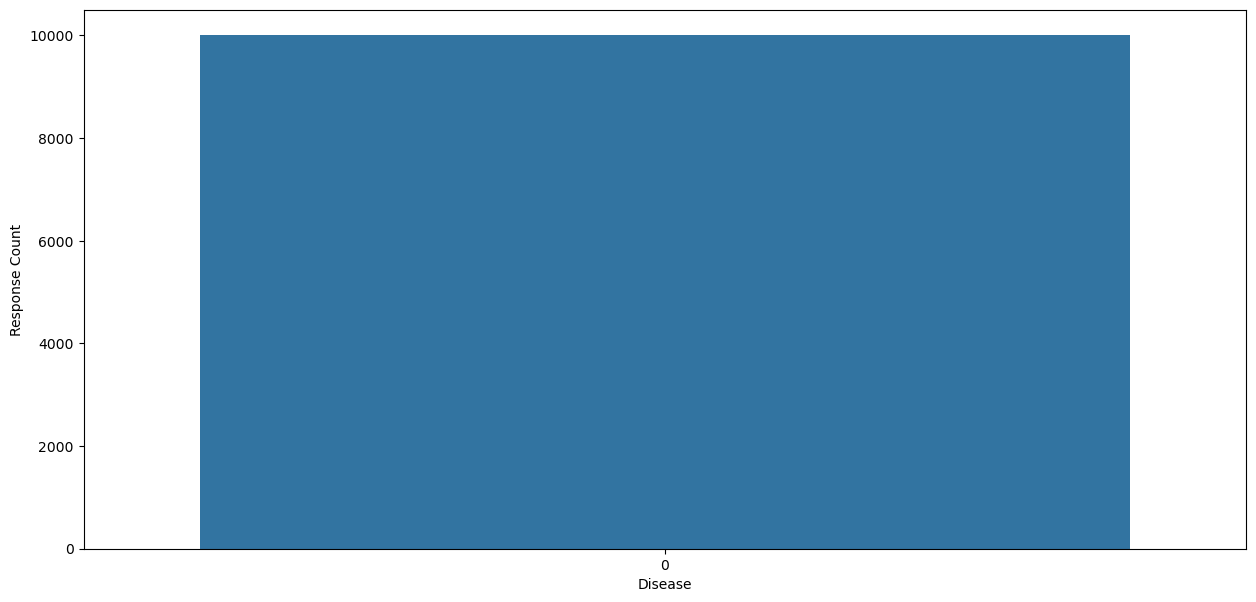

In [6]:
# Data Visualization
plt.rcParams["figure.figsize"] = (15, 7)

sns.countplot(Y)
plt.xlabel("Disease")
plt.ylabel("Response Count")
plt.show()

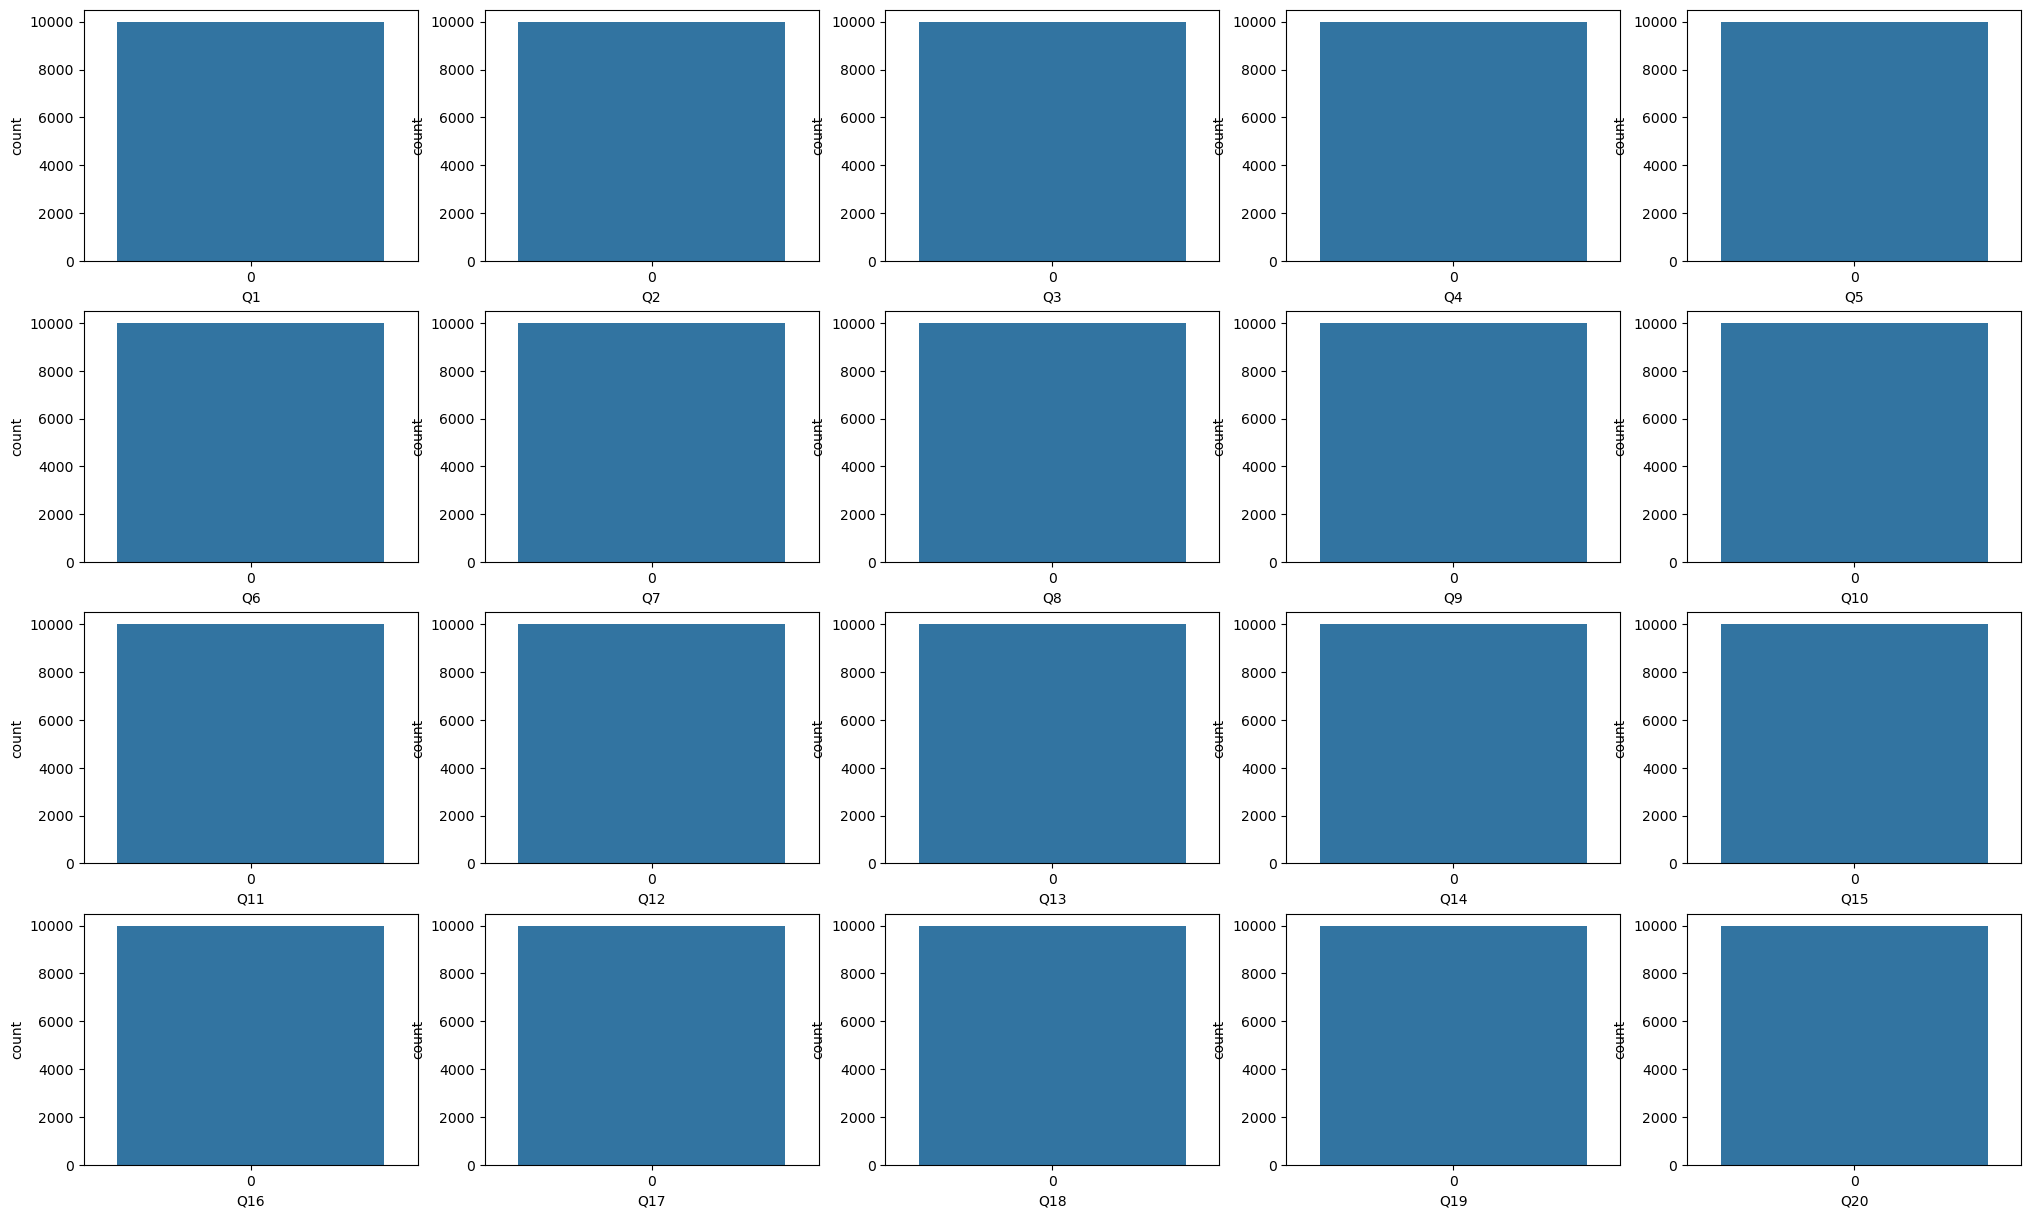

In [7]:
# Data Ditribution for each question
plt.rcParams["figure.figsize"] = (25, 15)
for i in range(X.shape[1]):
    plt.subplot(4, 5, i+1)
    sns.countplot(X[:, i])
    plt.xlabel(f"Q{i+1}")

In [8]:
# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modeling

In [9]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [10]:
from sklearn.metrics import accuracy_score

Ytest = rfc.predict(X_test)
Ytrain = rfc.predict(X_train)

print(f"Train Accuracy: {accuracy_score(Y_train, Ytrain)}")
print(f"Test Accuracy: {accuracy_score(Y_test, Ytest)}")

Train Accuracy: 0.9495
Test Accuracy: 0.9525


Text(0, 0.5, 'Features')

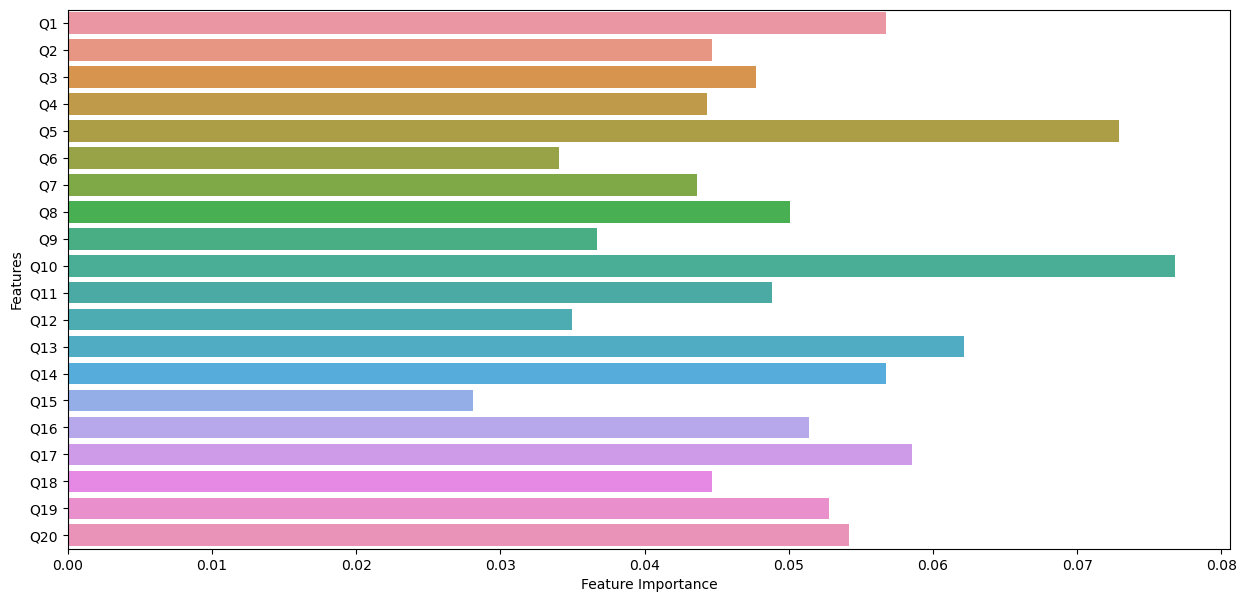

In [11]:
# plot feature importance
plt.rcParams["figure.figsize"] = (15, 7)
sns.barplot(x=rfc.feature_importances_, y=df.columns[:-1])
plt.xlabel("Feature Importance")
plt.ylabel("Features")


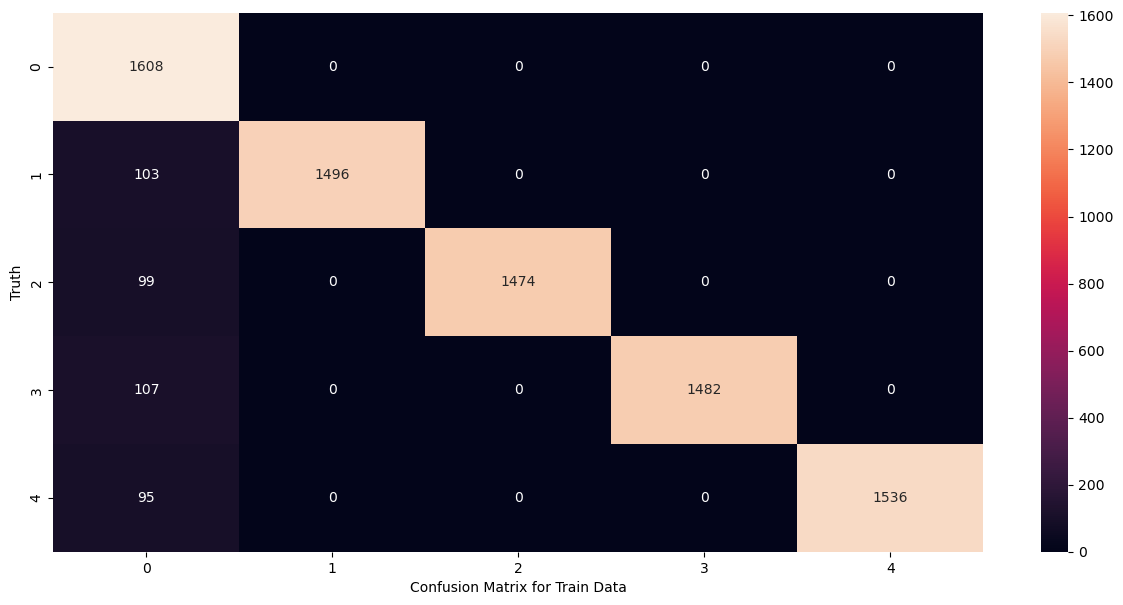

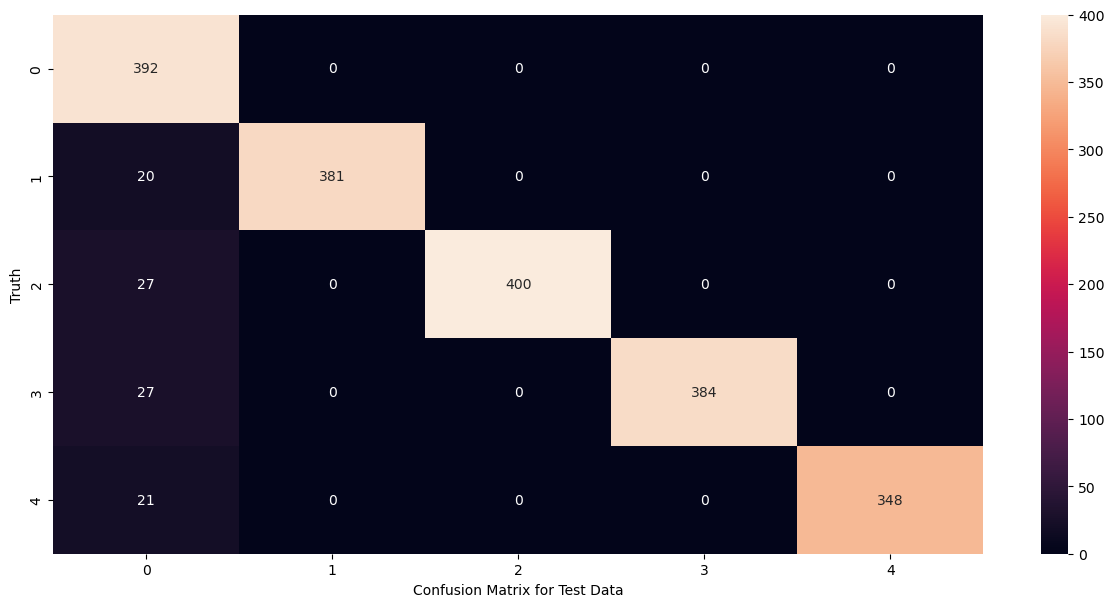

In [12]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

plt.rcParams["figure.figsize"] = (15, 7)
cm = confusion_matrix(Y_train, Ytrain)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.xlabel("Confusion Matrix for Train Data")
plt.show()

plt.rcParams["figure.figsize"] = (15, 7)
cm = confusion_matrix(Y_test, Ytest)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.xlabel("Confusion Matrix for Test Data")
plt.show()

In [13]:
file_name = 'model_file.sav'
joblib.dump(rfc, file_name)


['model_file.sav']